# Tiro Parabolico

Se modela el lanzamiento palabolico de una particula hacia una caja.

In [1]:
import numpy as np
import matplotlib.pylab as plt

## Runge-kutta

In [2]:
def rk4(f,xo,h, x0=5.7):
    h2=0.5*h
    
    conteo=0
    x=np.array([xo])
    while x[-1][1]>0 or conteo ==0:
        beta=np.random.uniform(0,0.05)
        k1= h*f(x[-1], beta)
        k2= h*f(x[-1]+0.5*k1, beta)
        k3= h*f(x[-1]+0.5*k2,beta)
        k4= h*f(x[-1]+k3,beta)
        X= x[-1]+(k1+2*(k2+k3)+k4)/6
        x=np.vstack((x, X))
        conteo +=1
        
        """Un condicional (if) que evalue la posicion de la ultima particula 
        x[-1] y observe si entro en la caja o golpeo en la pared."""
        if x[-1][0]>=x0:
            break
        
    if x[-1][1]<0:
        x[-1][0]=x[-1][0]-(x[-1][1]*(x[-2][0]-x[-1][0]))/(x[-2][1]-x[-1][1])
        x[-1][1]=0
        
    return x

In [3]:
def lanzamiento(Integrador, Masa, theta, Velocidad, Lambda,h, Grafica=False):
    m=Masa; lam=Lambda; v= Velocidad
    
    # condiciones iniciales
    g=9.8
    #v=12; theta=np.pi/4; m=19; lam=0.9; g=9.8; h= 1e-2
    xo=np.array([0,0]); vo=np.array([v*np.cos(theta), v*np.sin(theta)])
    #vo, xo  estos son los valores que entran al while de primer  lugar
    
    nu=np.array([0,0,vo[0],vo[1]])
    def dYdt(y,beta):
        #m=1;lam=0.9;g=9.8
        Vel= np.sqrt((y[2])**2 + (y[3])**2)
        return np.array([ y[2], y[-1], -(1/m)*(lam*y[2] + beta*Vel*y[2]), -g-(1/m)*(lam*y[-1] + beta*Vel*y[-1])])
    
    #dYdt(t,beta)
    Y=rk4(dYdt, nu, h)
    
    #Caja
    n=10; x0=5.7; xf=6.4; altura=xf-x0
    y=np.ones(n); x=np.linspace(x0,xf,n)#; y0=np.zeros(n) #Paralelas a x
    x1=np.ones(n); y1=np.linspace(0, altura,n); x2=np.ones(n) #Pralelas a Y
    
    
    if Grafica != False:
        plt.plot(Y[:,0], Y[:,1],".",  x,altura*y,"b", x,y*0,"b", x0*x1,y1, "b", xf*x2,y1, "b"), plt.grid();plt.show()
        plt.plot(Y[:,0], Y[:,1],".",  x,altura*y,"b", x,y*0,"r.", x0*x1,y1, "r.", xf*x2,y1, "b"), plt.xlim(5.5,6.4), plt.ylim(-0.0015,0.8), plt.legend(("Posicion X vs Y","Posicion en Y")), plt.grid(),plt.xlabel("X")
        plt.title("Lanzamiento de una partícula"),plt.ylabel("Y (t)");plt.show()
        #plt.plot(Y[:,0], Y[:,1],"."), plt.xlim(6,6.5), plt.ylim(-0.1,0.5),plt.grid() plt.xlim(-0.1,1.5), plt.ylim(-0.1,1.2),
    
    return Y, "Distancia MAX:",Y[:,0].max(), "Altura Maxima:", Y[:,1].max()

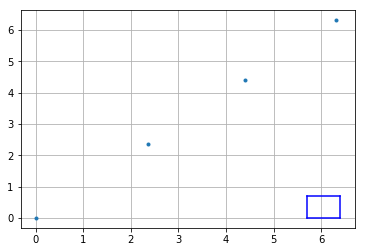

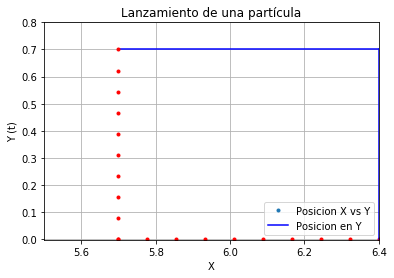

(array([[  0.        ,   0.        , 254.55844123, 254.55844123],
        [  2.34948378,   2.34901859, 217.2752601 , 217.18444409],
        [  4.39627376,   4.3944818 , 193.01089933, 192.83770448],
        [  6.31735265,   6.31334838, 191.207819  , 190.93870055]]),
 'Distancia MAX:',
 6.317352649187427,
 'Altura Maxima:',
 6.31334837786632)

In [9]:
#lanzamiento(rk4, 1, np.pi/6, 12, 0.9, 1e-2, 1)
lanzamiento(rk4, 1, np.pi/4, 360, 0.9, 1e-2, 1)

In [5]:
def histograma(lanzamiento, n, Numero_Particiones, Grafica=False):
    e=[]; ee=[]
    for i in range (n):
        Y=lanzamiento(rk4, 1, np.pi/4, 12, 0.9, 1e-2, 0)[0][:,0]  #X
        YY=lanzamiento(rk4, 1, np.pi/4, 12, 0.9, 1e-2, 0)[0][:,1] #Y
        e= np.hstack(( e,Y.max() ))
        ee=np.hstack((ee, YY.max()))
        
    if Grafica != False:
        plt.hist(e,Numero_Particiones);  plt.show() # particiones el segundo "45"
        
    return  "Desviación estandar en X:", e.std(), "Desviación estandar en Y:", ee.std()
#e, ee

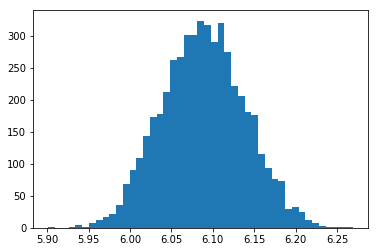

('Desviación estandar en X:',
 0.05015555762205279,
 'Desviación estandar en Y:',
 0.018171836132293576)

In [6]:
histograma(lanzamiento, 5000, 45, 1) # 10000, 9.57 minutos

In [7]:
 """Se está condicionando al sistema a que pegue en el piso, para que la partícula
no siga de largo. Donde "top"=altura y "distancia"=recorrido en x, Y[:,1]=posicion en y
e Y[:,0]=posisicion en x probenientes del runge-kutta."""

top=[0,] ;  distancia=[0,]
for i in range(1,len(t)):
    if Y[:,1][i]*Y[:,1][i-1] >= 0:
        posy= Y[:,1][i] ; top=np.hstack((top, posy))
        posx= Y[:,0][i] ; distancia=np.hstack((distancia, posx))
    else: 
        break
        
len(top), len(distancia)

NameError: name 't' is not defined

In [67]:
s=np.array([0,9,0,0])
r=np.array([0])
while s[-3] < 10 :
    l=s[-3]+1
    s=np.hstack((s,l))
s

array([ 0,  9,  0,  0, 10,  1,  1])

In [128]:
parametros={"lam": 0.9,"bmax": 0.05,"bmin": 0.,"theta": np.pi/4,"dt": 1.e-2,"vel": 12.,"mass":1.}

parametros["bmax"]

0.05

In [232]:
aa.max(), aa.min(), aa.argmax()#da la posicion del maximo

(1, 0, 2)

In [233]:
aa.strides?

In [5]:
"""Función que me grafica theta vs distancia maxima, es decir theta varia
de cero a pi/2 obteniendo la distancia maxima para cada theta."""
def Angulo_Distancia(theta_0, theta_f, n, Grafica=False):
    distancia=[]; angulos=np.linspace(theta_0, theta_f, n)
    for i in range(len(angulos)):
        angu=lanzamiento(rk4, 1, angulos[i], 12, 0.9, 1e-2, 0)[2]  #Nos genera la distancia maxima para cada theta
        distancia= np.hstack((distancia, angu)) 
        
    if Grafica != False:
        plt.plot(angulos, distancia), plt.grid(); plt.show()
    
    return "Distancia MAX::",distancia.max(), "Angulo:", angulos[distancia.argmax()]*(90)/(np.pi/2)

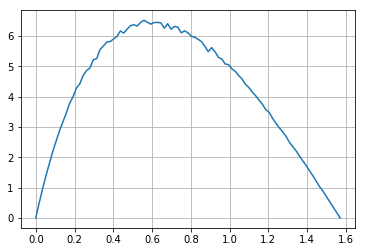

('Distancia MAX::', 6.518830040308751, 'Angulo:', 32.0)

In [6]:
Angulo_Distancia(0, np.pi/2, 91, 1)

In [7]:
"""se realiza n lanzamientos para distintos angulos, obteniendo el promedio
de las distancias mamximams para cada angulo."""
def varios_tiros(n, theta):
    repeticion=[]
    for i in range(n):
        z=lanzamiento(rk4, 1, theta, 12, 0.9, 1e-2, 0)[0][:,0] #Genera el vector "X" para cada lanzamiento
        repeticion=np.hstack((repeticion, z.max()))  #Se obtiene un arreglo de las distancias maximas
    return repeticion

"""Funcion que varia los angulos para cada n lanzammientos"""
def Promedio_distanciaMAX(theta_0, theta_f, paso_angulo, numero_de_lanzamiento, Grafica=False):
    distancia=[]; angulos=np.linspace(theta_0, theta_f, paso_angulo)
    for i in range(len(angulos)):
        angu=varios_tiros(numero_de_lanzamiento, angulos[i]).mean()  #Se obtiene el promedio de las distancias maximas para cada ángulo.
        distancia= np.hstack((distancia, angu))  #Es un arreglo del promedio de las distancias maximas para cada theta
        
    if Grafica!=False:
        plt.plot(angulos, distancia), plt.grid(); plt.show()
        
    return "Distancia Max:",distancia.max(), "Ángulo Max:",angulos[distancia.argmax()]*(90)/(np.pi/2)  

In [8]:
Promedio_distanciaMAX(np.pi/12, np.pi/3, 46, 30, 0)
#varios_tiros(10, np.pi/9).mean()

('Distancia Max:', 6.440596459391143, 'Ángulo Max:', 34.0)

In [9]:
"""Dimensiones de la caja LxL """
def caja(x0, xf, n, Grafica=False):   
    #n=10; x0=5.7; xf=6.4; 
    altura=xf-x0
    y=np.ones(n); x=np.linspace(x0,xf,n)#; y0=np.zeros(n) #Paralelas a x
    x1=np.ones(n); y1=np.linspace(0, altura,n); x2=np.ones(n) #Pralelas a Y
    if Grafica!=False:
        plt.plot(x,altura*y,"b", x,y*0,"b", x0*x1,y1, "b", xf*x2,y1, "b"),plt.grid(); plt.show()
    return n

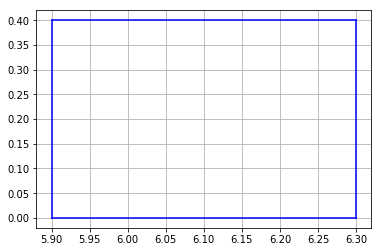

2

In [10]:
caja(5.9,6.30, 2, 1)

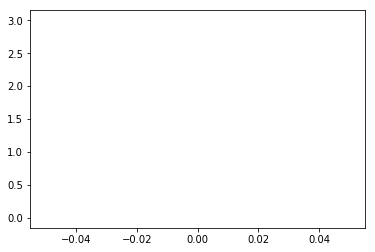

In [11]:
x1=np.array([0,0]); x2=np.array([3,0]); y1=np.array([0,4]); y2=np.array([0,3])
x=[0,0]; x0=[3,4]
plt.plot(x[0],x[1], x[0],x0[0])